RESPUESTAS TEÓRICAS:

- ¿Qué es un paradigma de programacion?
 Un paradigma de programación corresponde a un marco para la compresión de un problema de particular y la posterior implementación del código.

- ¿En qué se basa la programación orientada a objetos?
 La programación orientada a objetos (POO) corresponde a uno de los paradigmas más utilizados. Su función es modelar el mundo real. Un programa orientado a objetos consiste en ensamblar objetos y hacerlos interactuar entre ellos.

- ¿Cuál es la diferencia entre recursividad e iteración, y cómo se relaciona esto con la notación
big 𝑂?
 La diferencia entre recursión e iteración consiste en que iteración es cuando un método se repite varias veces. Por otro lado, la iteración se vuelve a llamar a si misma varias veces. La notación Big O se usa para medir el tiempo que tarda en ejecutarse un algoritmo.

- Explicar la diferencia de rendimiento entre 𝑂(1) y 𝑂(𝑛)
 EL redimiento 𝑂(1) a diferencia de 𝑂(𝑛) es independiente del tamaño de la entrada y es el tiempo de algorito más rápido. Por otro lado, el rendimiento 𝑂(𝑛),crece linealmente con el tamaño de la entrada.

- ¿Cómo se calcula el orden en un programa que funciona por etapas?
- ¿Cómo se puede determinar la complejidad temporal de un algoritmo recursivo?



In [231]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [232]:
from time import perf_counter
import matplotlib.pyplot as plt


tiempo Camino1: (6, 3.590000051190145e-05)


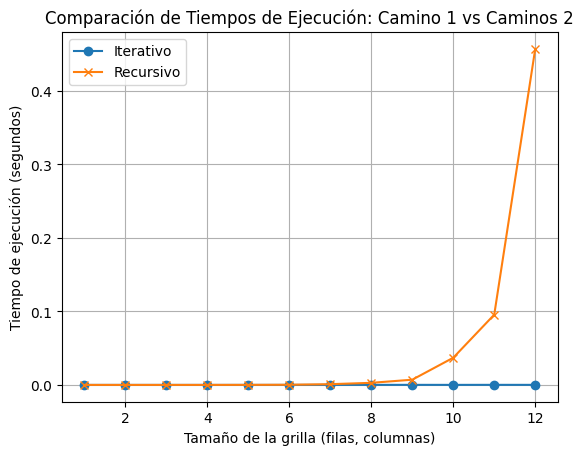

In [233]:
# Decorador para medir y almacenar el tiempo de ejecución
def medir_tiempo(func):
    

    def envoltura(self, *args, **kwargs):
        tiempo_inicio = perf_counter()
        resultado = func(self, *args, **kwargs)
        tiempo_total = perf_counter() - tiempo_inicio
        
        return resultado, tiempo_total

    
    return envoltura

class PCB:
    def __init__(self, filas, columnas):
        self.filas = filas
        self.columnas= columnas 


    def camino1(self):
        # Crear una grilla de 0's de tamaño filas x columnas
        grilla = [[0 for _ in range(self.columnas)] for _ in range(self.filas)]

        # Inicializar la primera fila y la primera columna con 1
        for j in range(self.columnas):
            grilla[0][j] = 1  # Primer fila a 1

        for i in range(self.filas):
            grilla[i][0] = 1  # Primer columna a 1

        # Rellenar el resto de las casillas según el número de caminos posibles
        for i in range(1, self.filas):
            for j in range(1, self.columnas):
                grilla[i][j] = grilla[i-1][j] + grilla[i][j-1]

        # Retornar el número de caminos a la última celda
        return grilla[self.filas-1][self.columnas-1]
    

    
    def caminos2(self, filas=None, columnas=None):
     # Si no se pasan parámetros, usamos los valores de self.filas y self.columnas
      if filas is None and columnas is None:
            filas, columnas = self.filas, self.columnas
      if filas == 1 or columnas == 1:
        return 1
     # Llamada recursiva: sumamos los caminos desde la celda de arriba y desde la celda de la izquierda
      return self.caminos2(filas -1, columnas) + self.caminos2(filas, columnas-1)
    
  # Método decorado para cambiar la solución
    @medir_tiempo
    def resolver(self, metodo):
          if metodo == "camino1":
            return self.camino1()
          elif metodo == "caminos2":
            return self.caminos2(self.filas, self.columnas)
          else:
            raise ValueError("Método no válido. Usa 'camino1' o 'caminos2'.")    
 

matriz = PCB(3,3)
print(f'tiempo Camino1: {matriz.resolver('camino1')}')



def generar_graficos_tiempos():
    valor = range(1, 13)
    tiempos_camino1 = []
    tiempos_caminos2 = []

    for n in valor:
        camino = PCB(n, n)
        resultado1, tiempo1 = camino.resolver('camino1')
        resultado2, tiempo2 = camino.resolver('caminos2')
        tiempos_camino1.append(tiempo1)
        tiempos_caminos2.append(tiempo2)

    # Limpiar el gráfico antes de crear uno nuevo
    plt.clf()

    # Graficar resultados
    plt.plot(valor, tiempos_camino1, label="Iterativo", marker='o')
    plt.plot(valor, tiempos_caminos2, label="Recursivo", marker='x')

    # Añadir títulos y etiquetas
    plt.title("Comparación de Tiempos de Ejecución: Camino 1 vs Caminos 2")
    plt.xlabel("Tamaño de la grilla (filas, columnas)")
    plt.ylabel("Tiempo de ejecución (segundos)")

    # Mover la leyenda a una posición más adecuada
    plt.legend(loc="upper left")

    # Añadir rejilla y guardar el gráfico antes de mostrarlo
    plt.grid(True)
    plt.savefig("grafico_comparativo.svg", format="svg")
    plt.show()

# Ejecutar la función para generar los gráficos
generar_graficos_tiempos()




Del gráfico "Comparación de Tiempos de Ejecución: Camino 1 vs Camino 2" se observa que el método del camino 1 correspondiente a la iteración toma un tiempo de ejecución constante. Por otro lado el camino 2 correspondiente a la recursión 